In [3]:
def load_data():
    rv = [54.]
    nr = len(rv) 
    
    def load_and_shuffle_dbs(rv):
        paths = []
        for r in rv:
            paths.append(f"/scratch/scarpolini/databases/db_lorenz_{r:.1f}.npy")
        
        n_traj = 50000
        db = np.ndarray(shape=(nr*n_traj,2000,1))
        labels = []
        for path,r,i in zip(paths,rv,range(nr)):
            db1 = np.load(path)
            for j in range(n_traj):
                db[i*n_traj + j,:,0] = db1[j,0,:]
                labels.append(r)
        
        labels = np.array(labels)
        
        def unison_shuffled_copies(a, b):
            assert len(a) == len(b)
            p = np.random.permutation(len(a))
            return a[p], b[p]
        
        db, labels = unison_shuffled_copies(db, labels)
        return db, labels
    

    db, labels = load_and_shuffle_dbs(rv)
    
    
    
    
    
    validation_split = 0.1
    
    sig_len = len(db[0,:,0])
    print(f"siglen: {sig_len}")
    channels = 1 #len(db[0,0,:])
    print(f"channels: {channels}")
    n_traj = len(db[:,0,0])
    print((f"n_traj: {n_traj}"))
    # numero della prima traiettoria usata come validation
    first_validation = round((1. - validation_split)*n_traj)
    print(f"first_validation: {first_validation}")
    db_train = np.ndarray(shape=(first_validation,sig_len,channels))
    db_test = np.ndarray(shape=(n_traj-first_validation,sig_len,channels))
    db_train = db[:first_validation,:,0:channels]
    db_test = db[first_validation:,:,0:channels]
    del db
    
    print(db_train.shape)
    M = np.max(np.append(db_train, db_test))
    m = np.min(np.append(db_train, db_test))
    print(M,m)
    db_train = (db_train - m)/(M - m)
    db_test = (db_test - m)/(M - m)
    M = np.max(db_train)
    m = np.min(db_train)
    print(M,m)
    
    return db_train, db_test

In [4]:
import numpy as np
db, _ = load_data()
gen = np.load('/scratch/scarpolini/lorenz_wgan/runs/9/gen_trajs.npy')

siglen: 2000
channels: 1
n_traj: 50000
first_validation: 45000
(45000, 2000, 1)
31.27666666957781 -31.28223237314301
1.0 0.00023727859524332888


In [4]:
g = np.gradient(db,axis=1)
gg = np.gradient(g,axis=1)
gm = np.gradient(gen,axis=1)
ggm = np.gradient(gm,axis=1)

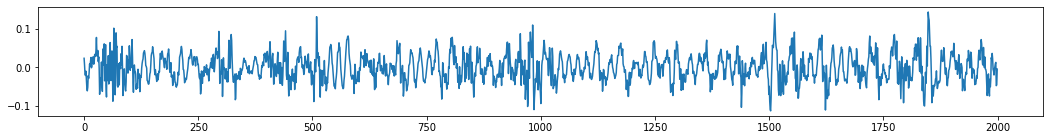

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,2))
#plt.plot(g[0])
#plt.plot(g[1])
plt.plot(gm[0])
plt.show()

In [7]:
g.shape

(45000, 2000, 1)

# PDF gradienti traiettorie vere vs fake

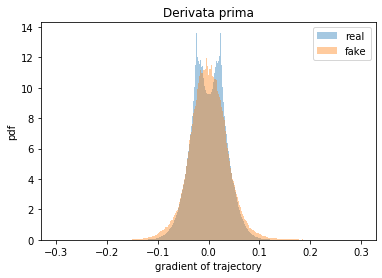

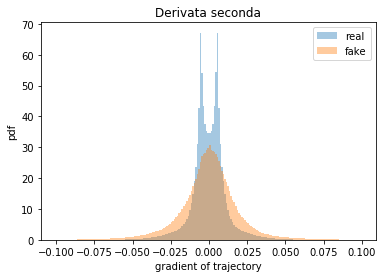

In [8]:
import matplotlib.pyplot as plt
plt.title('Derivata prima')
plt.hist(g.flatten(), bins=np.arange(-0.3,0.3,0.001), label='real', alpha=0.4, density=True)
plt.hist(gm.flatten(), bins=np.arange(-0.3,0.3,0.001), label='fake', alpha=0.4, density=True)
plt.legend()
plt.xlabel('gradient of trajectory')
plt.ylabel('pdf')
plt.savefig('plots/derivata_prima_confronto.png', fmt='png', dpi=220)
plt.show()

plt.title('Derivata seconda')
plt.hist(gg.flatten(), bins=np.arange(-0.1,0.1,0.001), label='real', alpha=0.4, density=True)
plt.hist(ggm.flatten(), bins=np.arange(-0.1,0.1,0.001), label='fake', alpha=0.4, density=True)
plt.legend()
plt.xlabel('gradient of trajectory')
plt.ylabel('pdf')
plt.savefig('plots/derivata_seconda_confronto.png', fmt='png', dpi=220)
plt.show()

# PDF traiettorie vere vs fake

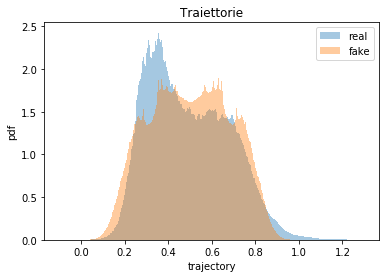

In [7]:
import matplotlib.pyplot as plt
plt.title('Traiettorie')
plt.hist(gen.flatten(), bins=np.arange(-0.1,1.3,0.003), label='real', alpha=0.4, density=True)
plt.hist(db.flatten(), bins=np.arange(-0.1,1.3,0.003), label='fake', alpha=0.4, density=True)
plt.legend()
plt.xlabel('trajectory')
plt.ylabel('pdf')
plt.savefig('plots/traiettorie_confronto.png', fmt='png', dpi=220)
plt.show()